In [1]:
# Setup (Imports)

from LoadData import *

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Flatten, Conv1D, BatchNormalization, Activation
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

import numpy as np

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Setup (Globals/Hyperz)

window_size = 30
epochs      = 600
batch_size  = 256
emb_size    = 5

In [3]:
# Loading and Splitting Data

def get_data(stock, output='up/down'):
    
    AllX, AllY = create_timeframed_alldata_classification_data(stock, window_size, norm=True, output=output)
    
    trainX, trainY, testX, testY = split_data(AllX, AllY, ratio=.85)
    
    return (trainX, trainY), (testX, testY)


In [4]:
# Setup (Create Model)

def get_model():
    
    model = Sequential()
    
    model.add(Conv1D(input_shape=(window_size, emb_size),
                     filters=16,
                     kernel_size=4,
                     padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Conv1D(filters=8,
                     kernel_size=4,
                     padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
 
    model.add(Flatten())
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(2, activation='softmax'))
    #model.add(Dense(1, activation='tanh'))
    
    model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
    #model.compile(loss='mse', optimizer='nadam')
        
    return model


In [5]:
# Run (Load)

(trainX, trainY), (testX, testY) = get_data('GOOG', output='up/down')

print(trainX.shape, trainY.shape)


(2771, 30, 5) (2771, 2)


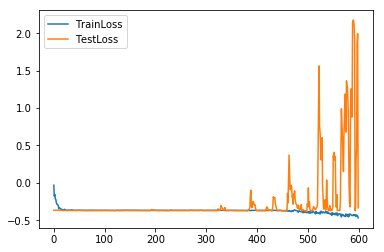

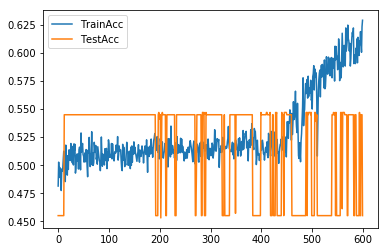

In [6]:
# Run (Train)

model = get_model()

# reduceLR = ReduceLROnPlateau(monitor='val_acc', factor=0.9, patience=30, min_lr=0.000001, verbose=1)

history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data=(testX, testY), verbose=0, callbacks=[])

plt.plot(np.log(history.history['loss']))
plt.plot(np.log(history.history['val_loss']))
plt.legend(['TrainLoss', 'TestLoss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['TrainAcc', 'TestAcc'])
plt.show()
